<a href="https://colab.research.google.com/github/anas1IA/2024_new_package/blob/main/TP__asynchronous_backtracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

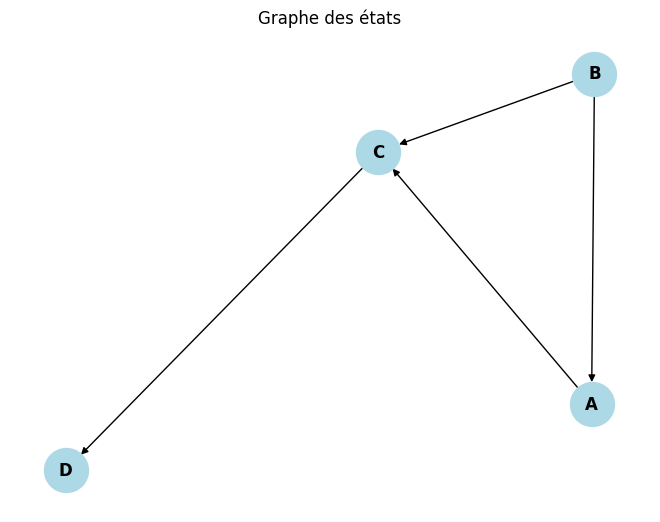

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Définition du graphe
G = nx.DiGraph()

# Ajout des nœuds
nodes = ['A', 'B', 'C', 'D']
G.add_nodes_from(nodes)

# Ajout des arêtes
edges = [('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'D')]
G.add_edges_from(edges)

# Définition de la position des nœuds pour la visualisation
pos = nx.spring_layout(G)

# Dessin du graphe
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, font_weight='bold', arrows=True)

# Affichage de la visualisation
plt.title("Graphe des états")
plt.show()

In [3]:
class ColorAgent:
    def __init__(self, agent_id, colors, neighbors, agents, constraints):
        self.agent_id = agent_id
        self.colors = colors
        self.neighbors = neighbors
        self.agents = agents
        self.constraints = constraints

    def is_nogood(self, assignment, color):
        for neighbor_id in self.neighbors:
            neighbor_color = assignment.get(neighbor_id)
            if neighbor_color == color:
                return True
            if (neighbor_id, '!=', self.agent_id) in self.constraints.get(neighbor_id, []):
                if neighbor_color == color:
                    return True
        return False

    def backtracking(self, assignment):
        print(f"Agent {self.agent_id} - Assignment: {assignment}")
        if self.agent_id in assignment:
            print(f"Agent {self.agent_id} already assigned. Moving to next agent.")
            next_agent_id = chr(ord(self.agent_id) + 1)
            if next_agent_id in self.agents:
                return self.agents[next_agent_id].backtracking(assignment)
            else:
                print(f"Agent {self.agent_id} - No next agent. Solution found.")
                return True

        for color in self.colors:
            if not self.is_nogood(assignment, color):
                print(f"Agent {self.agent_id} - Trying color {color}")
                assignment[self.agent_id] = color
                next_agent_id = chr(ord(self.agent_id) + 1)
                if next_agent_id in self.agents:
                    print(f"Agent {self.agent_id} - Passing assignment to next agent.")
                    if self.agents[next_agent_id].backtracking(assignment):
                        return True
                    else:
                        print(f"Agent {self.agent_id} - Color {color} not valid. Backtracking.")
                else:
                    print(f"Agent {self.agent_id} - No next agent. Solution found.")
                    return True
        print(f"Agent {self.agent_id} - No valid color found. Backtracking.")
        return False


def visualize_assignment(assignment):
    for agent_id, color in assignment.items():
        print(f"Agent {agent_id}: Color {color}")





In [7]:
if __name__ == '__main__':
    constraints_dict = {
        'A': [('C', '!=', 'A'),('B', '!=', 'A')],
        'B': [('A', '!=', 'B'), ('C', '!=', 'B')],
        'C': [('D', '!=', 'C'),('B', '!=', 'C'),('A', '!=', 'C')],
        'D': [('C', '!=', 'D')]
    }

    agents = {}
    for agent_id, constraints in constraints_dict.items():
        neighbors = []
        for neighbor_id, _, _ in constraints:
            if neighbor_id != agent_id:
                neighbors.append(neighbor_id)
        agents[agent_id] = ColorAgent(agent_id, [0, 1, 2], neighbors, agents, constraints_dict)

    assignment = {}
    result = agents['A'].backtracking(assignment)

    if result:
        print("Solution found:")
        visualize_assignment(assignment)
    else:
        print("No solution found.")

Agent A - Assignment: {}
Agent A - Trying color 0
Agent A - Passing assignment to next agent.
Agent B - Assignment: {'A': 0}
Agent B - Trying color 1
Agent B - Passing assignment to next agent.
Agent C - Assignment: {'A': 0, 'B': 1}
Agent C - Trying color 2
Agent C - Passing assignment to next agent.
Agent D - Assignment: {'A': 0, 'B': 1, 'C': 2}
Agent D - Trying color 0
Agent D - No next agent. Solution found.
Solution found:
Agent A: Color 0
Agent B: Color 1
Agent C: Color 2
Agent D: Color 0
